In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_11.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_11.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,4.015613e-11,1.791519e-09,4.065635e-11,0.800912,2.281080e-11,3.870388e-13,0.000001,1.761095e-09,...,3.861233e-09,1.147270e-27,1.034828e-16,1.841295e-17,3.329476e-08,1.449058e-05,-1.024943e-03,7.375568e-27,4.614240e-27,2.989388e-28
1,0.000017,0.405009,1.551901e-10,3.398326e-09,1.524162e-10,0.800912,8.736662e-11,2.883962e-12,0.000003,7.040975e-09,...,8.408697e-09,5.865217e-27,2.354168e-16,5.644849e-17,5.076582e-08,1.494436e-05,-1.025253e-03,5.194367e-26,3.289433e-26,2.173792e-27
2,0.000025,0.405009,3.374406e-10,4.840156e-09,3.213987e-10,0.800912,1.880483e-10,9.349497e-12,0.000004,1.583716e-08,...,1.447302e-08,1.872176e-26,4.231093e-16,1.244764e-16,6.876819e-08,1.538559e-05,-1.025560e-03,2.044725e-25,1.336614e-25,8.815767e-27
3,0.000033,0.405009,5.799688e-10,6.134899e-09,5.357113e-10,0.800912,3.196251e-10,2.140676e-11,0.000005,2.814664e-08,...,2.190517e-08,4.543944e-26,6.682211e-16,2.286598e-16,8.728620e-08,1.581296e-05,-1.025865e-03,5.839121e-25,3.970103e-25,2.591125e-26
4,0.000042,0.405009,8.766365e-10,7.298417e-09,7.854623e-10,0.800912,4.773745e-10,4.042596e-11,0.000007,4.396642e-08,...,3.057128e-08,9.247764e-26,9.723629e-16,3.739448e-16,1.063028e-07,1.622545e-05,-1.026167e-03,1.360775e-24,9.650523e-25,6.210766e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.951477,1.536801e+00,1.173991e+00,2.897998e-01,0.019365,6.069672e-01,9.838269e-01,0.009384,1.368009e-02,...,1.754655e-19,7.437727e-21,2.619507e-21,5.509568e-24,2.823866e-25,2.592432e-27,3.304597e-29,8.153684e-20,3.394413e-20,2.491555e-21
119995,0.999967,0.951477,1.536801e+00,1.173991e+00,2.897998e-01,0.019365,6.069672e-01,9.838269e-01,0.009384,1.368009e-02,...,1.762526e-19,7.370011e-21,2.627347e-21,5.523016e-24,2.793199e-25,2.581890e-27,3.328806e-29,8.171480e-20,3.407292e-20,2.448239e-21
119996,0.999975,0.951477,1.536801e+00,1.173991e+00,2.897998e-01,0.019365,6.069672e-01,9.838269e-01,0.009384,1.368009e-02,...,1.733161e-19,7.517912e-21,2.622956e-21,5.528938e-24,2.805202e-25,2.599096e-27,3.307132e-29,8.138682e-20,3.403730e-20,2.504804e-21
119997,0.999983,0.951477,1.536801e+00,1.173991e+00,2.897998e-01,0.019365,6.069672e-01,9.838269e-01,0.009384,1.368009e-02,...,1.727973e-19,7.606864e-21,2.618572e-21,5.521239e-24,2.824130e-25,2.604537e-27,3.308574e-29,8.157743e-20,3.413734e-20,2.511324e-21


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

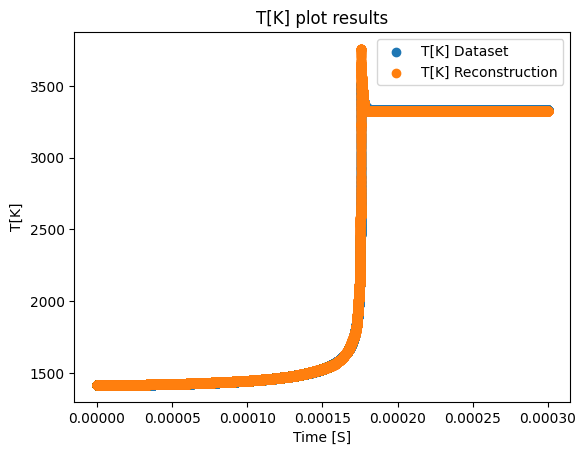

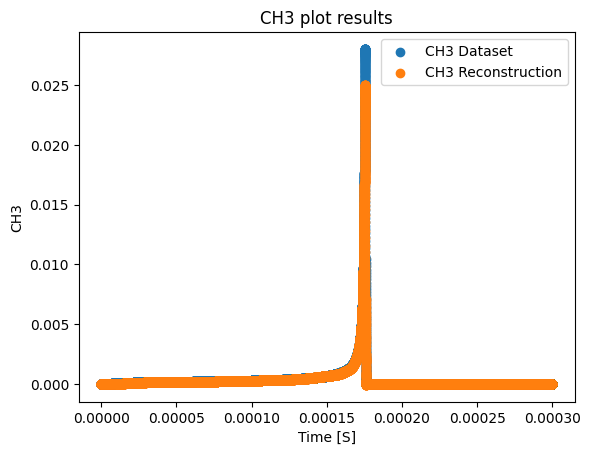

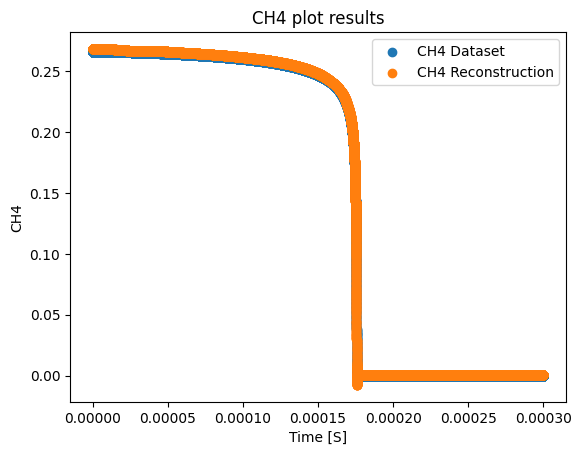

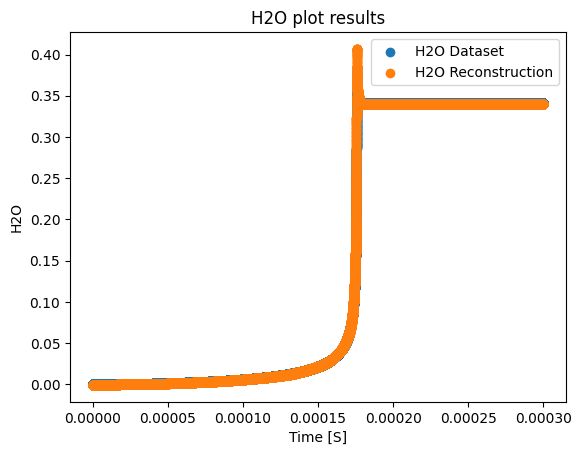

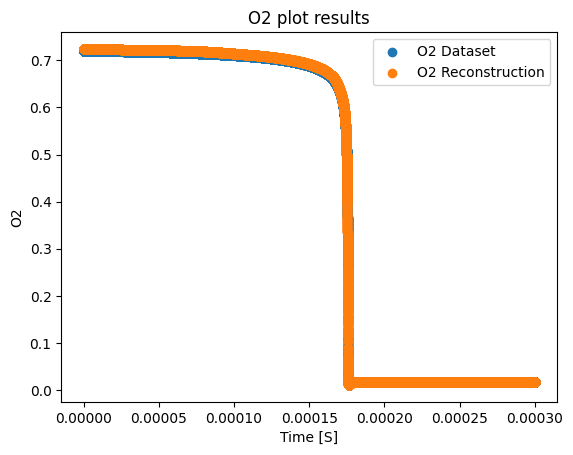

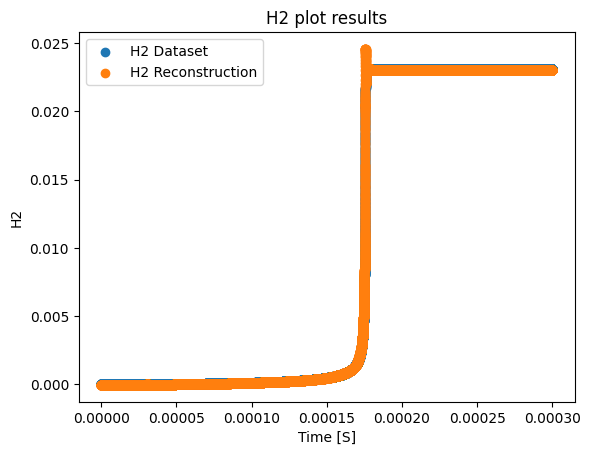

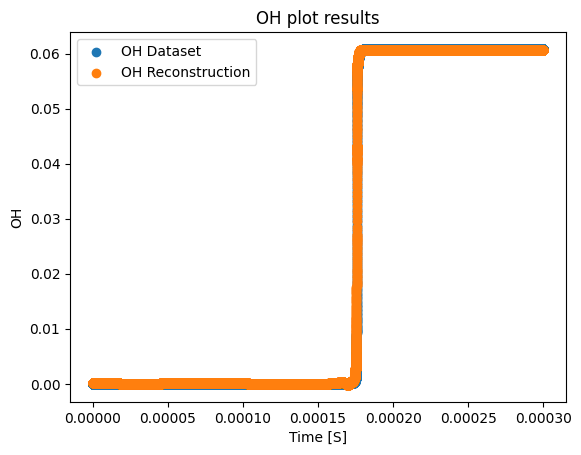

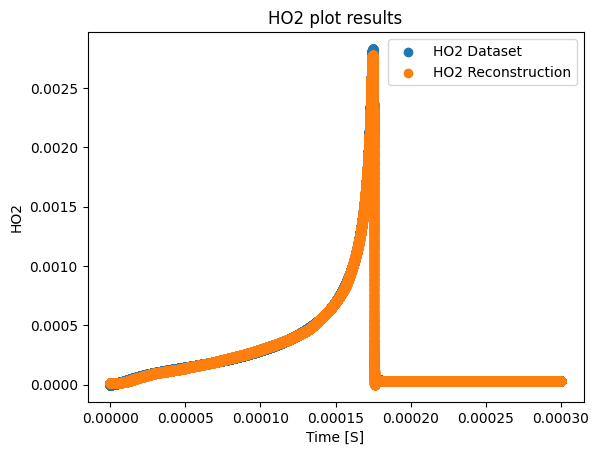

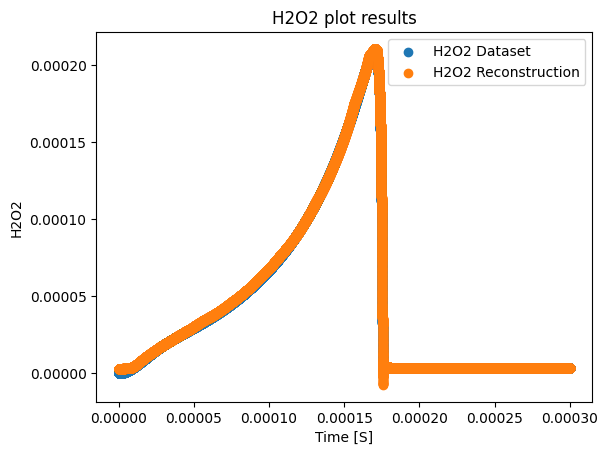

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

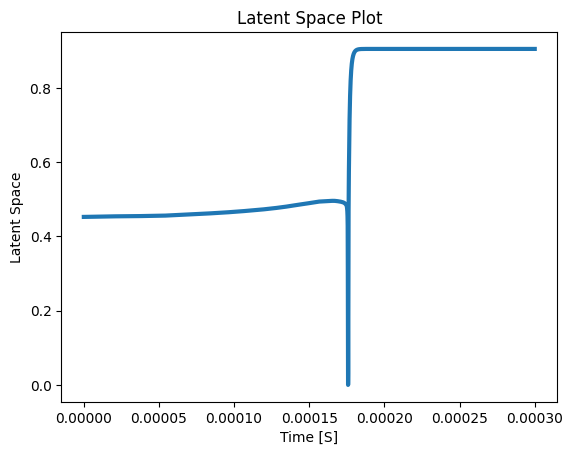

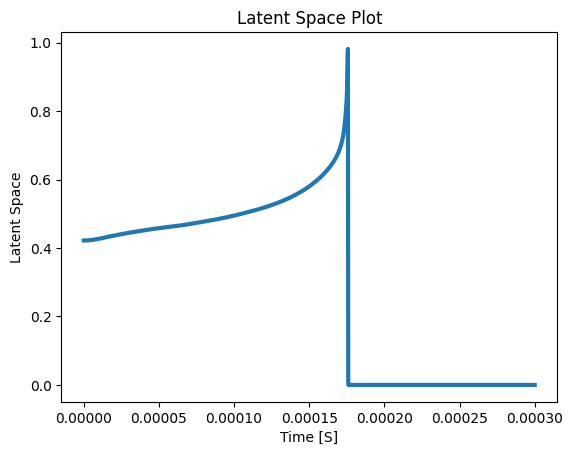

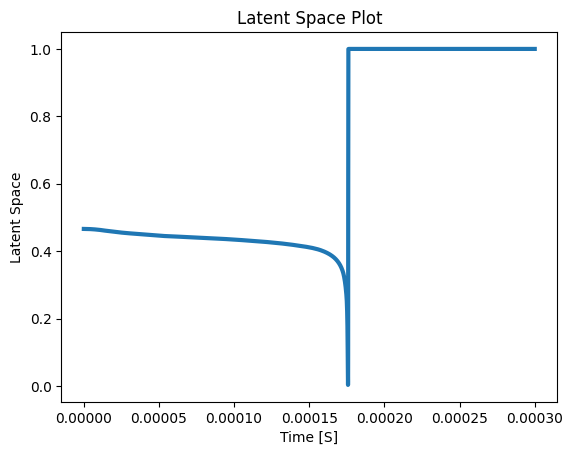

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,4.015613e-11,1.791519e-09,4.065635e-11,0.800912,2.281080e-11,3.870388e-13,0.000001,1.761095e-09,6.002068e-35,...,9.974807e-10,6.934022e-29,2.559138e-17,2.743172e-18,1.636894e-08,1.402596e-05,-1.024632e-03,2.563683e-28,1.738841e-28,1.007121e-29
1,0.405009,1.551901e-10,3.398326e-09,1.524162e-10,0.800912,8.736662e-11,2.883962e-12,0.000003,7.040975e-09,2.930796e-33,...,3.861233e-09,1.147270e-27,1.034828e-16,1.841295e-17,3.329476e-08,1.449058e-05,-1.024943e-03,7.375568e-27,4.614240e-27,2.989388e-28
2,0.405009,3.374406e-10,4.840156e-09,3.213987e-10,0.800912,1.880483e-10,9.349497e-12,0.000004,1.583716e-08,2.463182e-32,...,8.408697e-09,5.865217e-27,2.354168e-16,5.644849e-17,5.076582e-08,1.494436e-05,-1.025253e-03,5.194367e-26,3.289433e-26,2.173792e-27
3,0.405009,5.799688e-10,6.134899e-09,5.357113e-10,0.800912,3.196251e-10,2.140676e-11,0.000005,2.814664e-08,1.008558e-31,...,1.447302e-08,1.872176e-26,4.231093e-16,1.244764e-16,6.876819e-08,1.538559e-05,-1.025560e-03,2.044725e-25,1.336614e-25,8.815767e-27
4,0.405009,8.766365e-10,7.298417e-09,7.854623e-10,0.800912,4.773745e-10,4.042596e-11,0.000007,4.396642e-08,2.859734e-31,...,2.190517e-08,4.543944e-26,6.682211e-16,2.286598e-16,8.728620e-08,1.581296e-05,-1.025865e-03,5.839121e-25,3.970103e-25,2.591125e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.951477,1.536801e+00,1.173991e+00,2.897998e-01,0.019365,6.069672e-01,9.838269e-01,0.009384,1.368009e-02,3.432881e-06,...,1.711454e-19,7.515689e-21,2.614198e-21,5.502569e-24,2.809710e-25,2.598815e-27,3.284165e-29,8.171924e-20,3.400525e-20,2.483709e-21
119995,0.951477,1.536801e+00,1.173991e+00,2.897998e-01,0.019365,6.069672e-01,9.838269e-01,0.009384,1.368009e-02,3.432881e-06,...,1.754655e-19,7.437727e-21,2.619507e-21,5.509568e-24,2.823866e-25,2.592432e-27,3.304597e-29,8.153684e-20,3.394413e-20,2.491555e-21
119996,0.951477,1.536801e+00,1.173991e+00,2.897998e-01,0.019365,6.069672e-01,9.838269e-01,0.009384,1.368009e-02,3.432881e-06,...,1.762526e-19,7.370011e-21,2.627347e-21,5.523016e-24,2.793199e-25,2.581890e-27,3.328806e-29,8.171480e-20,3.407292e-20,2.448239e-21
119997,0.951477,1.536801e+00,1.173991e+00,2.897998e-01,0.019365,6.069672e-01,9.838269e-01,0.009384,1.368009e-02,3.432881e-06,...,1.733161e-19,7.517912e-21,2.622956e-21,5.528938e-24,2.805202e-25,2.599096e-27,3.307132e-29,8.138682e-20,3.403730e-20,2.504804e-21


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.818840,0.921995,0.921985,0.921984,-0.824546,0.921984,0.822522,-0.143363,-0.048458,0.816541,...,-0.101954,-0.106844,-0.107421,-0.107031,-0.102625,-0.208756,0.025748,-0.107304,-0.107247,-0.107540
1,-0.104624,-0.202622,-0.202622,-0.202621,0.102373,-0.202621,-0.100351,0.870255,0.771742,-0.094373,...,0.806109,0.831619,0.832197,0.831806,0.820764,0.727099,0.285619,0.832082,0.832024,0.832318
2,0.146287,0.165615,0.165615,0.165614,-0.143986,0.165614,0.141920,-0.848275,-0.828058,0.135811,...,-0.863108,-0.889158,-0.889746,-0.889347,-0.878073,-0.781807,-0.331221,-0.889628,-0.889569,-0.889869


H2     0.921995
H      0.921985
OH     0.921984
O      0.921984
CO2    0.921972
Name: 0, dtype: float64
C2H5     0.935394
C2H4     0.935368
CH3      0.934460
CH3O     0.934394
CH3OH    0.934021
Name: 1, dtype: float64
CH4w    0.914901
O2w     0.892684
H2      0.165615
H       0.165615
OH      0.165614
Name: 2, dtype: float64


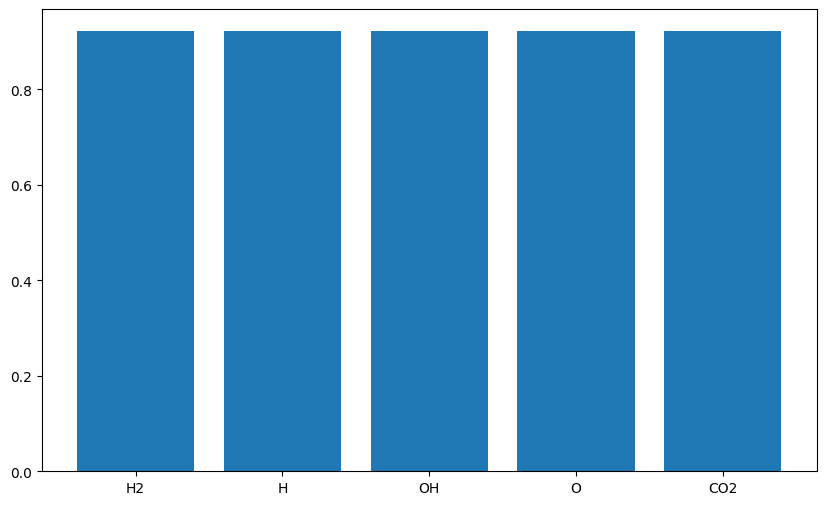

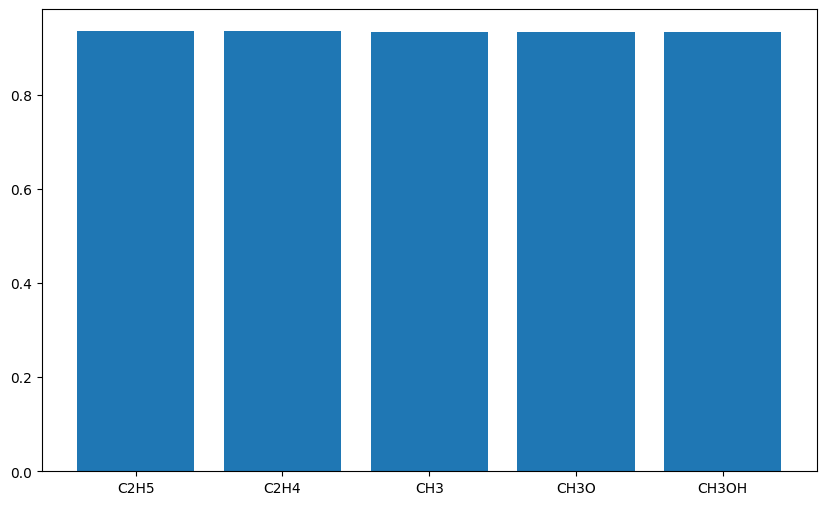

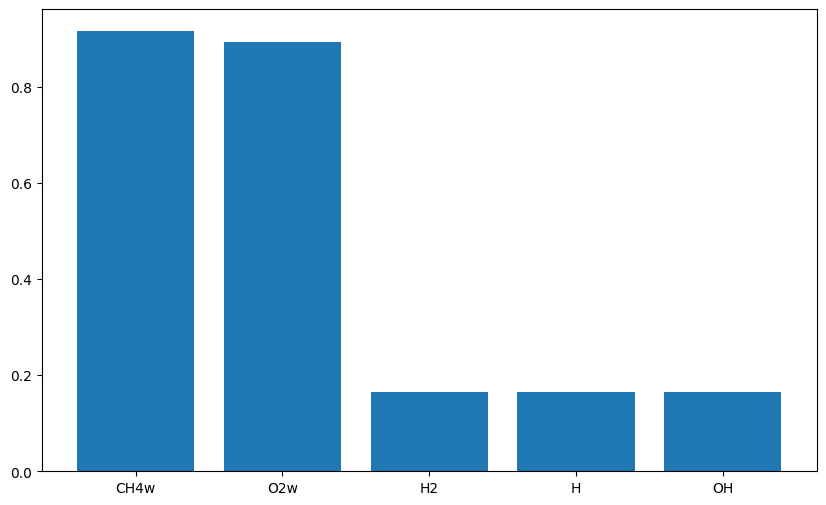

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.913085,0.971650,0.971650,0.971650,-0.917224,0.971650,0.912630,-0.421993,-0.382626,0.903975,...,-0.498370,-0.502983,-0.505714,-0.505154,-0.498955,-0.536566,-0.129798,-0.504555,-0.504910,-0.505273
1,-0.510630,-0.566612,-0.566612,-0.566612,0.511434,-0.566612,-0.509837,0.935672,0.883562,-0.496244,...,0.882607,0.919842,0.919126,0.918563,0.902894,0.881848,0.335326,0.919766,0.919327,0.919795
2,0.536005,0.550447,0.550448,0.550448,-0.537922,0.550448,0.535102,-0.924059,-0.913136,0.521364,...,-0.912017,-0.949788,-0.948910,-0.948342,-0.932514,-0.910925,-0.359119,-0.949635,-0.949157,-0.949634


H      0.97165
OH     0.97165
O      0.97165
CO2    0.97165
H2     0.97165
Name: 0, dtype: float64
C2H4     0.977813
C2H5     0.977598
CH3OH    0.977369
CH3O     0.976965
CH3      0.976824
Name: 1, dtype: float64
CH4w    0.966497
O2w     0.953033
H       0.550448
OH      0.550448
O       0.550448
Name: 2, dtype: float64


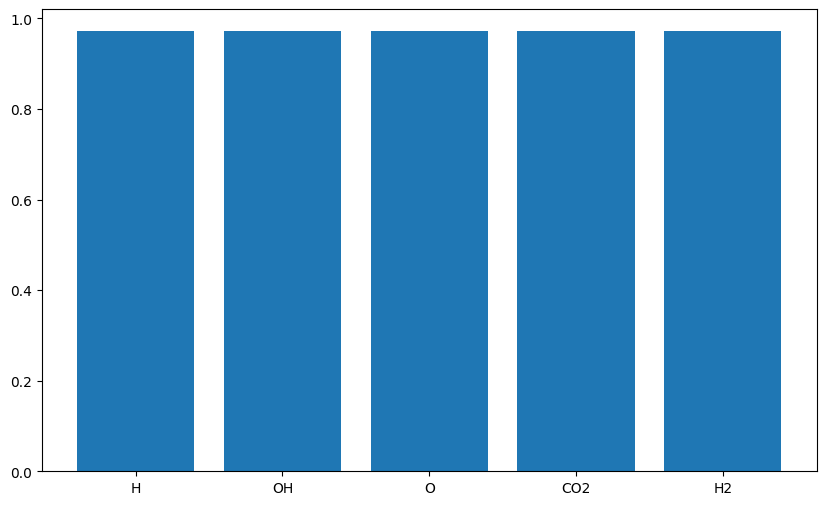

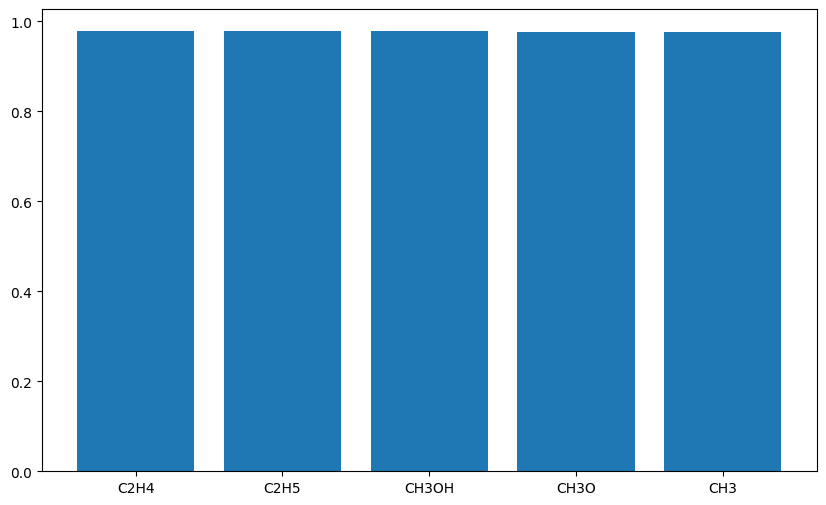

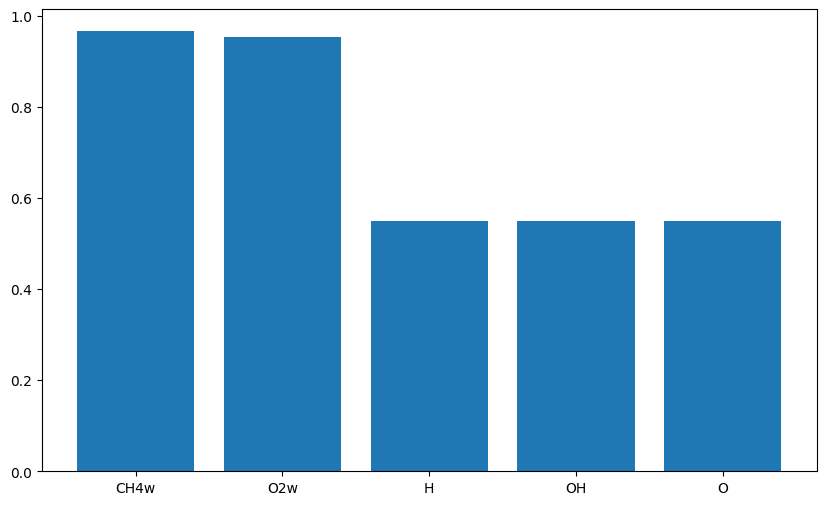

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.818830,0.921997,0.921987,0.921986,-0.824534,0.921986,0.822510,-0.143350,-0.048451,0.816528,...,-0.101947,-0.106808,-0.107377,-0.106987,-0.102615,-0.208714,0.025728,-0.107268,-0.107210,-0.107504
1,-0.104598,-0.202616,-0.202615,-0.202615,0.102349,-0.202615,-0.100327,0.870272,0.771726,-0.094349,...,0.806077,0.831596,0.832165,0.831774,0.820733,0.727066,0.285600,0.832057,0.831999,0.832293
2,0.146261,0.165606,0.165606,0.165606,-0.143962,0.165606,0.141896,-0.848274,-0.828040,0.135788,...,-0.863074,-0.889132,-0.889712,-0.889313,-0.878040,-0.781771,-0.331212,-0.889601,-0.889542,-0.889842


H2     0.921997
H      0.921987
OH     0.921986
O      0.921986
CO2    0.921974
Name: 0, dtype: float64
C2H5     0.935420
C2H4     0.935365
CH3      0.934487
CH3O     0.934435
CH3OH    0.934033
Name: 1, dtype: float64
CH4w    0.914923
O2w     0.892693
H2      0.165606
H       0.165606
OH      0.165606
Name: 2, dtype: float64


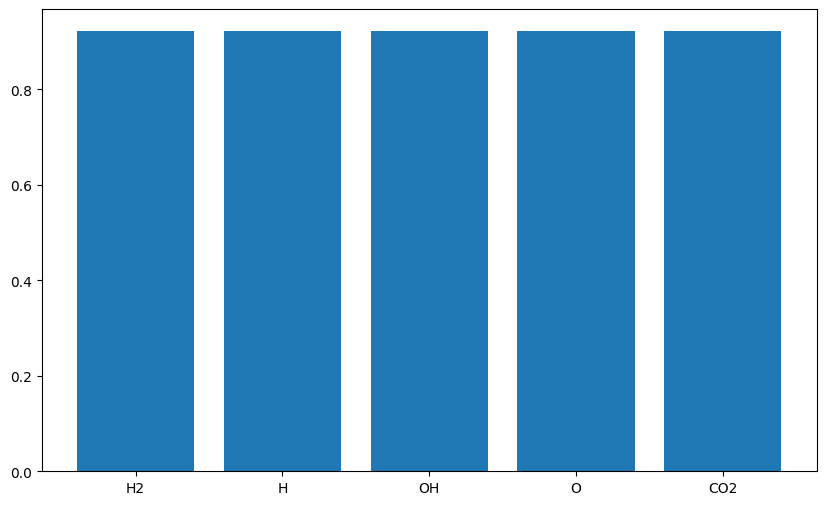

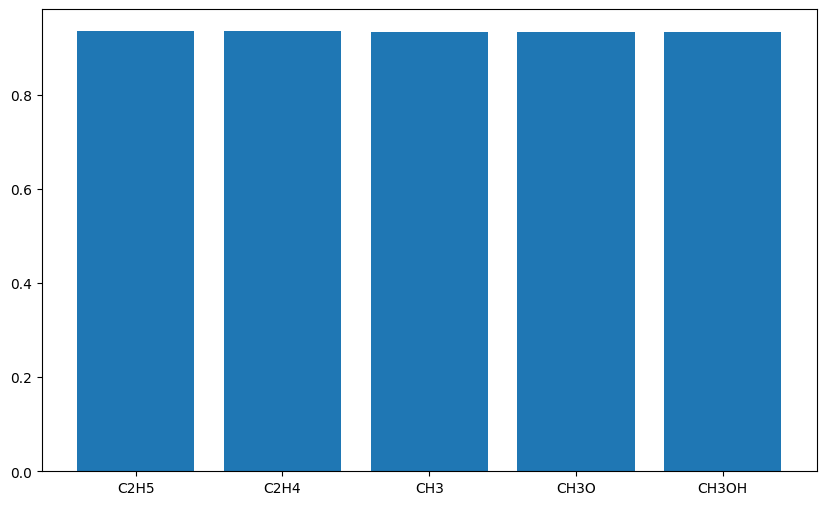

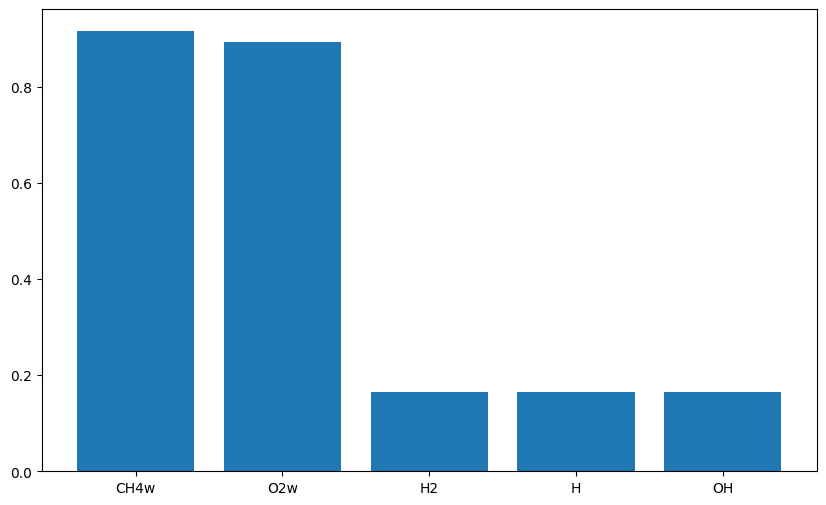

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)